# Import Required Libraries
Import necessary libraries including pandas, numpy, matplotlib, seaborn, and scikit-learn modules for data manipulation, visualization, and machine learning.

In [1]:
# Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression

# Load the Cleaned Car Datasets
Load the cleaned car datasets from the processed_data folder and select one dataset for further analysis.

In [4]:
# Load the Cleaned Car Datasets

# Load the cleaned car datasets
car_data_clean = pd.read_csv('processed_data/car_data_clean.csv')
car_dekho_clean = pd.read_csv('processed_data/car_dekho_clean.csv')
car_v3_clean = pd.read_csv('processed_data/car_v3_clean.csv')
car_v4_clean = pd.read_csv('processed_data/car_v4_clean.csv')

# Display the first few rows of each dataset to understand their structure
print("car_data_clean:")
print(car_data_clean.head())
print("\ncar_dekho_clean:")
print(car_dekho_clean.head())
print("\ncar_v3_clean:")
print(car_v3_clean.head())
print("\ncar_v4_clean:")
print(car_v4_clean.head())

# Select one dataset for further analysis (e.g., car_data_clean)
selected_dataset = car_data_clean

# Display the first few rows of the selected dataset
print("\nSelected Dataset (car_data_clean):")
print(selected_dataset.head())

car_data_clean:
  car_name  year  selling_price  present_price  kms_driven fuel_type  \
0     ritz  2014           3.35           5.59       27000    petrol   
1      sx4  2013           4.75           9.54       43000    diesel   
2     ciaz  2017           7.25           9.85        6900    petrol   
3  wagon r  2011           2.85           4.15        5200    petrol   
4    swift  2014           4.60           6.87       42450    diesel   

  seller_type transmission  owner  
0      dealer       manual      0  
1      dealer       manual      0  
2      dealer       manual      0  
3      dealer       manual      0  
4      dealer       manual      0  

car_dekho_clean:
                       name  year  selling_price  km_driven    fuel  \
0             maruti 800 ac  2007          60000      70000  petrol   
1  maruti wagon r lxi minor  2007         135000      50000  petrol   
2      hyundai verna 1.6 sx  2012         600000     100000  diesel   
3    datsun redigo t option  2017

# Data Exploration
Explore the dataset by examining its structure, summary statistics, and relationships between features to better understand the data.


Summary Statistics of Selected Dataset (car_data_clean):
              year  selling_price  present_price     kms_driven       owner
count   299.000000     299.000000     299.000000     299.000000  299.000000
mean   2013.615385       4.589632       7.541037   36916.752508    0.043478
std       2.896868       4.984240       8.567887   39015.170352    0.248720
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.850000       1.200000   15000.000000    0.000000
50%    2014.000000       3.510000       6.100000   32000.000000    0.000000
75%    2016.000000       6.000000       9.840000   48883.500000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000

Missing Values in Selected Dataset (car_data_clean):
car_name         0
year             0
selling_price    0
present_price    0
kms_driven       0
fuel_type        0
seller_type      0
transmission     0
owner            0
dtype: int64


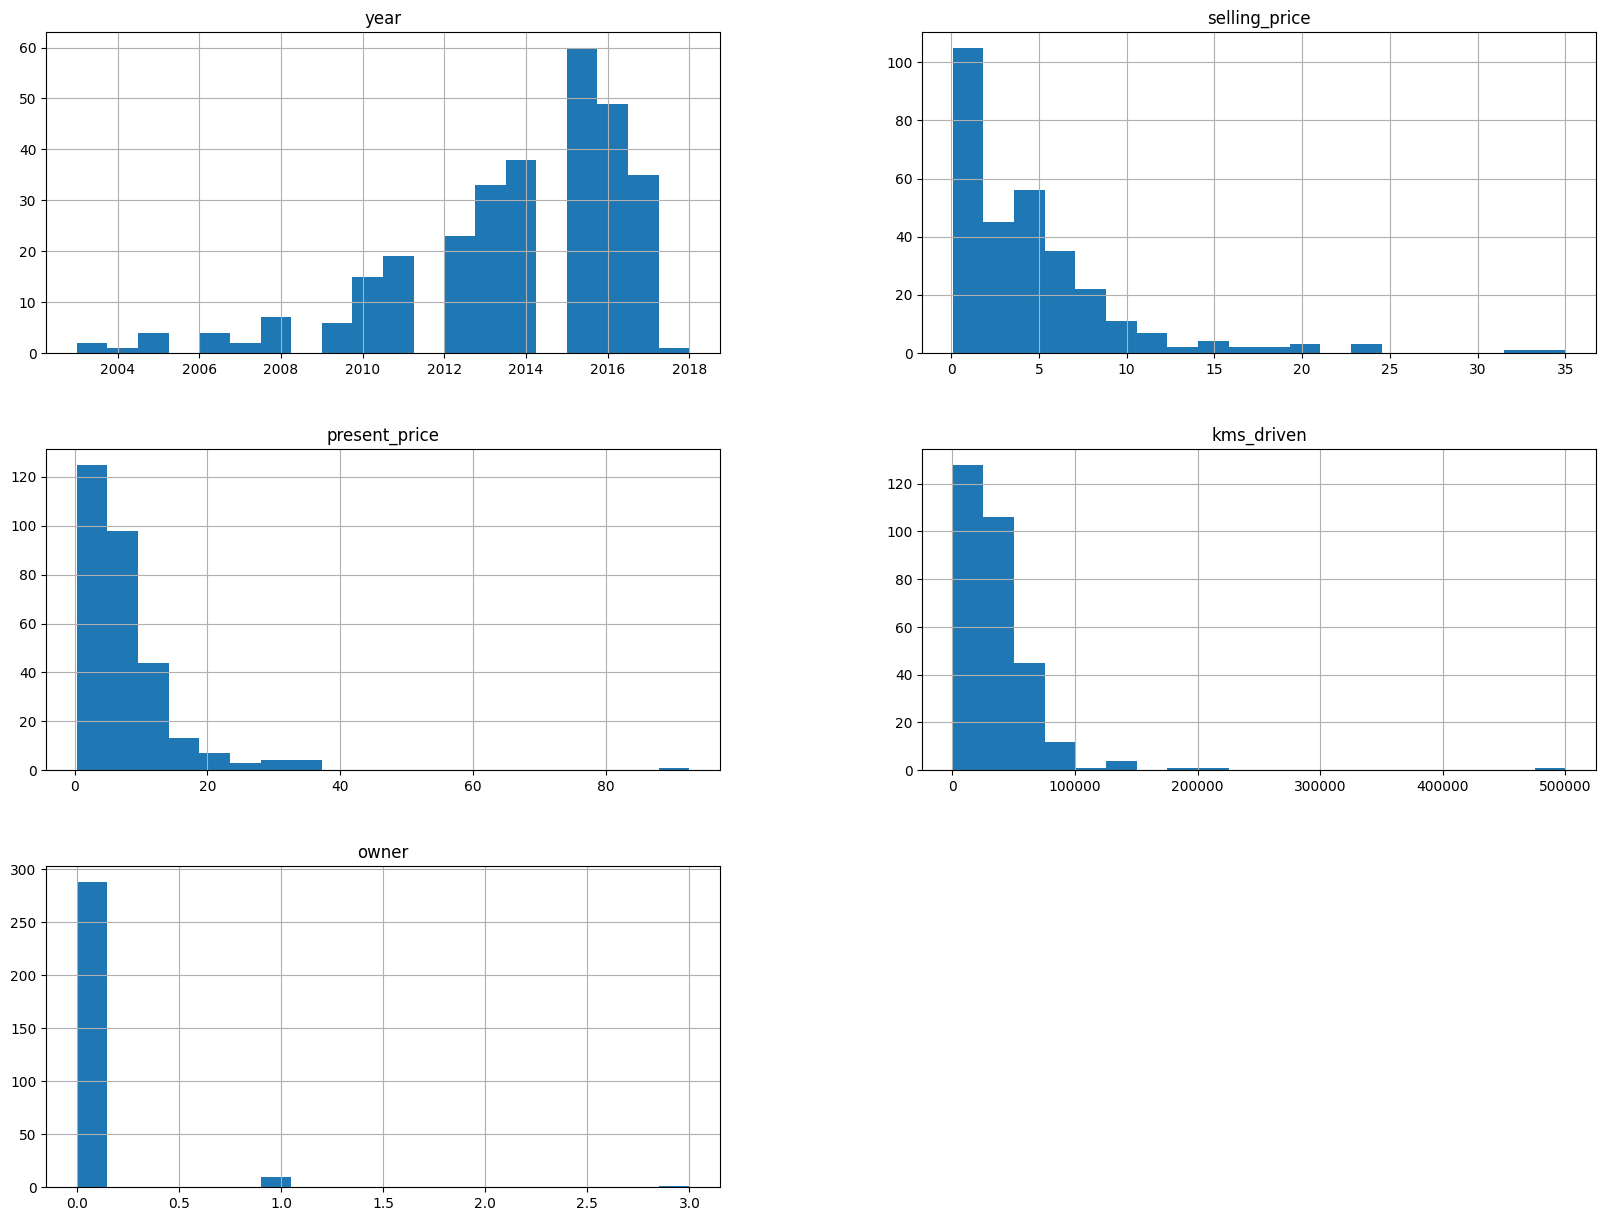

ValueError: could not convert string to float: 'ritz'

<Figure size 1200x800 with 0 Axes>

In [5]:
# Display summary statistics of the selected dataset
print("\nSummary Statistics of Selected Dataset (car_data_clean):")
print(selected_dataset.describe())

# Check for missing values in the selected dataset
print("\nMissing Values in Selected Dataset (car_data_clean):")
print(selected_dataset.isnull().sum())

# Visualize the distribution of each feature
selected_dataset.hist(bins=20, figsize=(20, 15))
plt.show()

# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
correlation_matrix = selected_dataset.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of Selected Dataset (car_data_clean)')
plt.show()

# Visualize relationships between features using pairplot
sns.pairplot(selected_dataset)
plt.show()

# Feature Selection Methods
Implement various feature selection techniques including correlation analysis, feature importance with tree-based models, recursive feature elimination (RFE), and statistical methods to identify the most relevant features.

In [6]:
# Feature Selection Methods

# 1. Correlation Analysis
# Select features with high correlation to the target variable
correlation_threshold = 0.1  # Adjust threshold as needed
correlation_matrix = selected_dataset.corr()
target_variable = 'price'  # Replace with the actual target variable name
correlated_features = correlation_matrix[target_variable][abs(correlation_matrix[target_variable]) > correlation_threshold].index.tolist()
print("Features with high correlation to the target variable:")
print(correlated_features)

# 2. Feature Importance with Tree-Based Models
from sklearn.ensemble import RandomForestRegressor

# Define the features (X) and target (y)
X = selected_dataset.drop(columns=[target_variable])
y = selected_dataset[target_variable]

# Train a RandomForestRegressor to determine feature importance
model = RandomForestRegressor()
model.fit(X, y)
feature_importances = pd.Series(model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("\nFeature Importances from RandomForestRegressor:")
print(feature_importances)

# Select top N features based on importance
top_n = 10  # Adjust the number of top features as needed
top_features = feature_importances.head(top_n).index.tolist()
print("\nTop N features based on importance:")
print(top_features)

# 3. Recursive Feature Elimination (RFE)
from sklearn.feature_selection import RFE

# Use RFE with a RandomForestRegressor
rfe = RFE(estimator=RandomForestRegressor(), n_features_to_select=top_n)
rfe.fit(X, y)
rfe_features = X.columns[rfe.support_].tolist()
print("\nSelected features using RFE:")
print(rfe_features)

# 4. Statistical Methods (SelectKBest with f_regression)
k_best = SelectKBest(score_func=f_regression, k=top_n)
k_best.fit(X, y)
k_best_features = X.columns[k_best.get_support()].tolist()
print("\nSelected features using SelectKBest with f_regression:")
print(k_best_features)

# Combine all selected features
all_selected_features = list(set(correlated_features + top_features + rfe_features + k_best_features))
print("\nAll selected features combined:")
print(all_selected_features)

# Update the dataset to include only the selected features
selected_dataset = selected_dataset[all_selected_features + [target_variable]]
print("\nUpdated dataset with selected features:")
print(selected_dataset.head())

ValueError: could not convert string to float: 'ritz'

# Feature Importance Visualization
Create visualizations of feature importance scores and selected features to aid in understanding which features contribute most to predicting the target variable.

In [7]:
# Feature Importance Visualization

# Visualize feature importances from RandomForestRegressor
plt.figure(figsize=(12, 8))
sns.barplot(x=feature_importances, y=feature_importances.index)
plt.title('Feature Importances from RandomForestRegressor')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualize selected features from RFE
plt.figure(figsize=(12, 8))
sns.barplot(x=rfe.estimator_.feature_importances_, y=rfe_features)
plt.title('Selected Features using RFE')
plt.xlabel('Importance Score')
plt.ylabel('Features')
plt.show()

# Visualize selected features from SelectKBest with f_regression
k_best_scores = k_best.scores_[k_best.get_support()]
plt.figure(figsize=(12, 8))
sns.barplot(x=k_best_scores, y=k_best_features)
plt.title('Selected Features using SelectKBest with f_regression')
plt.xlabel('Score')
plt.ylabel('Features')
plt.show()

NameError: name 'feature_importances' is not defined

<Figure size 1200x800 with 0 Axes>

# Train-Test Split Implementation
Split the dataset into training and testing sets using scikit-learn's train_test_split function with appropriate parameters to ensure proper model evaluation.

In [ ]:
# Train-Test Split Implementation

# Define the features (X) and target (y) for the updated dataset
X = selected_dataset.drop(columns=[target_variable])
y = selected_dataset[target_variable]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the training and testing sets
print("Training set shape (X_train, y_train):", X_train.shape, y_train.shape)
print("Testing set shape (X_test, y_test):", X_test.shape, y_test.shape)

# Model Training with Selected Features
Train a linear regression model using only the selected features from the training dataset.

In [ ]:
# Model Training with Selected Features

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the linear regression model
linear_regression_model = LinearRegression()

# Train the model using the training data
linear_regression_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = linear_regression_model.predict(X_test)

# Evaluate the model performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
print("Mean Squared Error (MSE):", mse)
print("R-squared (R2):", r2)

# Visualize the actual vs predicted values
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Values')
plt.show()

# Model Evaluation
Evaluate the trained model using appropriate metrics (e.g., R², MSE, MAE) on both training and test sets to assess performance and check for overfitting.

In [ ]:
# Model Evaluation

from sklearn.metrics import mean_absolute_error

# Evaluate the model on the training set
y_train_pred = linear_regression_model.predict(X_train)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)
train_mae = mean_absolute_error(y_train, y_train_pred)

# Evaluate the model on the test set
test_mse = mean_squared_error(y_test, y_pred)
test_r2 = r2_score(y_test, y_pred)
test_mae = mean_absolute_error(y_test, y_pred)

# Display the evaluation metrics for both training and test sets
print("Training Set Evaluation Metrics:")
print("Mean Squared Error (MSE):", train_mse)
print("R-squared (R2):", train_r2)
print("Mean Absolute Error (MAE):", train_mae)

print("\nTest Set Evaluation Metrics:")
print("Mean Squared Error (MSE):", test_mse)
print("R-squared (R2):", test_r2)
print("Mean Absolute Error (MAE):", test_mae)

# Visualize the residuals
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred - y_test, alpha=0.7, label='Test Residuals')
plt.scatter(y_train, y_train_pred - y_train, alpha=0.7, label='Train Residuals')
plt.hlines(y=0, xmin=min(y_test.min(), y_train.min()), xmax=max(y_test.max(), y_train.max()), colors='r', linestyles='dashed')
plt.xlabel('Actual')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.legend()
plt.show()